In [1]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./dataset_final_fix.csv')
df.head()

,timestamp,src_ip,dst_ip,protocol,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,...,mqtt_messagetype,mqtt_messagelength,mqtt_flag_uname,mqtt_flag_passwd,mqtt_flag_retain,mqtt_flag_qos,mqtt_flag_willflag,mqtt_flag_clean,mqtt_flag_reserved,is_attack
0,2/2/2022 16:42,192168114,1.921681e+09,6,40,0,1.0,0.0,0.0,60129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2/2/2022 16:42,192168114,1.921681e+09,6,64,40,1.0,0.0,0.0,60130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2/2/2022 16:42,192168114,1.921681e+09,6,64,40,1.0,0.0,0.0,60131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2/2/2022 16:42,192168114,1.921681e+09,6,64,40,1.0,0.0,0.0,60132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2/2/2022 16:42,192168114,1.921681e+09,6,64,40,1.0,0.0,0.0,60133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
df_attack = df[df['is_attack'] == 1]
df_normal = df[df['is_attack'] == 0]

In [4]:
df['ttl'] = df['ttl'].fillna(df['ttl'].std())
df['ip_len'] = df['ip_len'].fillna(df['ip_len'].std())
df['ip_flag_df'] = df['ip_flag_df'].fillna(df['ip_flag_df'].std())
df['ip_flag_mf'] = df['ip_flag_mf'].fillna(df['ip_flag_mf'].std())
df['ip_flag_rb'] = df['ip_flag_rb'].fillna(df['ip_flag_rb'].std())
df['src_port'] = df['src_port'].fillna(df['src_port'].std())
df['dst_port'] = df['dst_port'].fillna(df['dst_port'].std())
df['tcp_flag_res'] = df['tcp_flag_res'].fillna(df['tcp_flag_res'].std())
df['tcp_flag_ns'] = df['tcp_flag_ns'].fillna(df['tcp_flag_ns'].std())
df['tcp_flag_cwr'] = df['tcp_flag_cwr'].fillna(df['tcp_flag_cwr'].std())
df['tcp_flag_ecn'] = df['tcp_flag_ecn'].fillna(df['tcp_flag_ecn'].std())
df['tcp_flag_urg'] = df['tcp_flag_urg'].fillna(df['tcp_flag_urg'].std())
df['tcp_flag_ack'] = df['tcp_flag_ack'].fillna(df['tcp_flag_ack'].std())
df['tcp_flag_push'] = df['tcp_flag_push'].fillna(df['tcp_flag_push'].std())
df['tcp_flag_reset'] = df['tcp_flag_reset'].fillna(df['tcp_flag_reset'].std())
df['tcp_flag_syn'] = df['tcp_flag_syn'].fillna(df['tcp_flag_syn'].std())
df['tcp_flag_fin'] = df['tcp_flag_fin'].fillna(df['tcp_flag_fin'].std())
df['mqtt_messagetype'] = df['mqtt_messagetype'].fillna(df['mqtt_messagetype'].std())
df['mqtt_messagelength'] = df['mqtt_messagelength'].fillna(df['mqtt_messagelength'].std())
df['mqtt_flag_uname'] = df['mqtt_flag_uname'].fillna(df['mqtt_flag_uname'].std())
df['mqtt_flag_passwd'] = df['mqtt_flag_passwd'].fillna(df['mqtt_flag_passwd'].std())
df['mqtt_flag_retain'] = df['mqtt_flag_retain'].fillna(df['mqtt_flag_retain'].std())
df['mqtt_flag_qos'] = df['mqtt_flag_qos'].fillna(df['mqtt_flag_qos'].std())
df['mqtt_flag_willflag'] = df['mqtt_flag_willflag'].fillna(df['mqtt_flag_willflag'].std())
df['mqtt_flag_clean'] = df['mqtt_flag_clean'].fillna(df['mqtt_flag_clean'].std())
df['mqtt_flag_reserved'] = df['mqtt_flag_reserved'].fillna(df['mqtt_flag_reserved'].std())

df = df.drop(['timestamp','src_ip','dst_ip','protocol' ], axis = 1)
df.head()

,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,dst_port,tcp_flag_res,tcp_flag_ns,tcp_flag_cwr,...,mqtt_messagetype,mqtt_messagelength,mqtt_flag_uname,mqtt_flag_passwd,mqtt_flag_retain,mqtt_flag_qos,mqtt_flag_willflag,mqtt_flag_clean,mqtt_flag_reserved,is_attack
0,40,0,1.0,0.0,0.0,60129,1883,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,64,40,1.0,0.0,0.0,60130,1883,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,64,40,1.0,0.0,0.0,60131,1883,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,64,40,1.0,0.0,0.0,60132,1883,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,64,40,1.0,0.0,0.0,60133,1883,0.0,0.0,0.0,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


0    48174
1    42157
Name: is_attack, dtype: int64

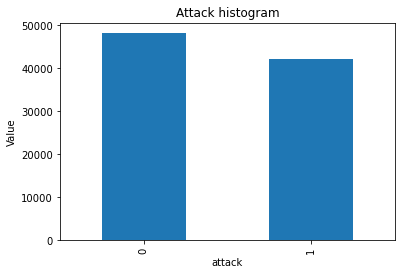

In [5]:
pd.value_counts(df['is_attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['is_attack'].value_counts()

In [6]:
# Used to plot the roc curve.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)

# Used for splitting and normalizing dataset.
def test_scale():
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

In [7]:
X = df.iloc[:, df.columns != 'is_attack']
y = df.iloc[:, df.columns == 'is_attack']
X, y = SMOTE().fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(7), activation='relu', solver='adam', learning_rate_init=0.8, max_iter=100)

clf.fit(X_train, y_train)

C:\Users\Adit\anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=7, learning_rate_init=0.8, max_iter=100)

In [9]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

Confusion matrix:
 [[12003     0]
 [    1 12083]]


C:\Users\Adit\AppData\Local\Temp/ipykernel_8960/391629920.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\Adit\AppData\Local\Temp/ipykernel_8960/391629920.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


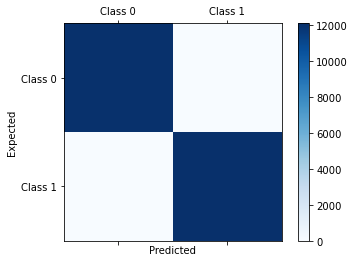

Accuracy 0.9999584838294515
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12003
           1       1.00      1.00      1.00     12084

    accuracy                           1.00     24087
   macro avg       1.00      1.00      1.00     24087
weighted avg       1.00      1.00      1.00     24087

AUC Score: 
0.9999586229725257


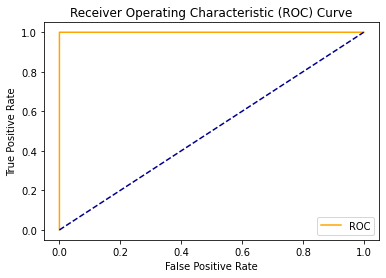

In [10]:
classif_results()

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

akurasi = round(accuracy_score(y_test,y_pred),3)
print('akurasi :',akurasi)
precision = round(precision_score(y_test,y_pred),3)
print('presisi :',precision)
recal = round(recall_score(y_test,y_pred),3)
print('recall :',recal)
f1_score = 2 * precision * recal / (precision+recal)
print('f1_score :', f1_score)

akurasi : 1.0
presisi : 1.0
recall : 1.0
f1_score : 1.0


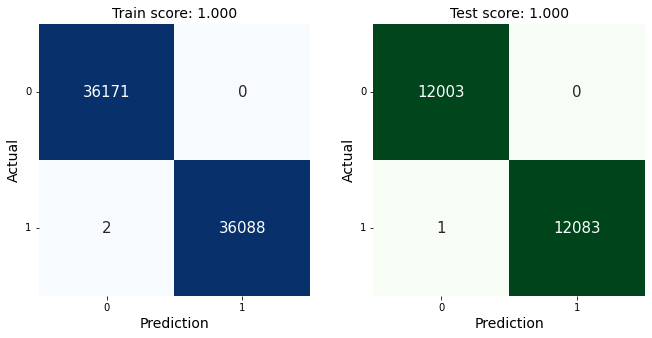

In [12]:
from jcopml.plot import plot_confusion_matrix

plot_confusion_matrix(X_train, y_train, X_test, y_test, clf)